# Imports and Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('..\data\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
print('Shape of the dataset: ', df.shape)

print('\nType of the data: \n',df.dtypes)

print("\nNull values in the dataset:\n ",df.isnull().sum())

Shape of the dataset:  (7043, 21)

Type of the data: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Null values in the dataset:
  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Stre

# Clean Data Types & Missing Values

In [3]:
# convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nChecking for Duplicate Rows: ", df.duplicated().sum())

# Drop customerID
df.drop(columns='customerID', inplace=True)


Checking for Duplicate Rows:  0


# EDA — Churn Distribution, Tenure, Charges

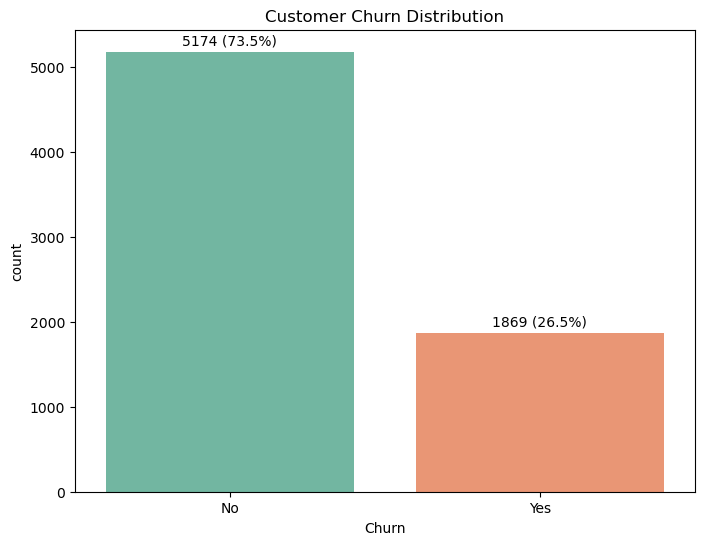

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('..\output', exist_ok=True)

# Churn Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, palette='Set2',hue='Churn')
plt.title('Customer Churn Distribution')

for bar in ax.patches:
    count = int(bar.get_height())
    percentage = count / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2, count+50, f'{count} ({percentage:.1f}%)', 
            ha='center', va='bottom')
    
plt.savefig('..\\output\\churn_distribution.png')
plt.show()

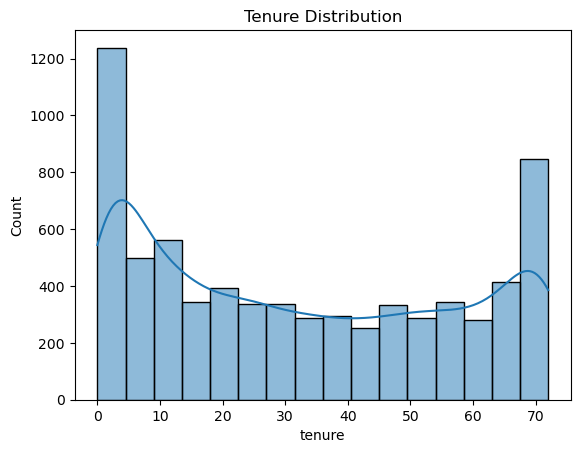

In [5]:
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.savefig('../output/tenure_distribution.png')
plt.show()

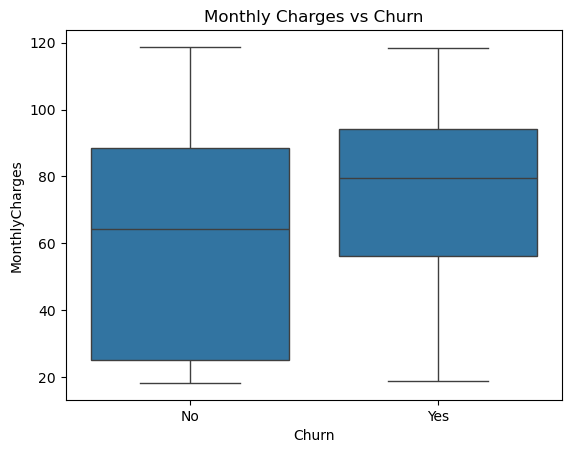

In [6]:
# Monthly Charges Boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.savefig('../output/monthly_charges_boxplot.png')
plt.show()

# Correlation Heatmap & Contract Churn

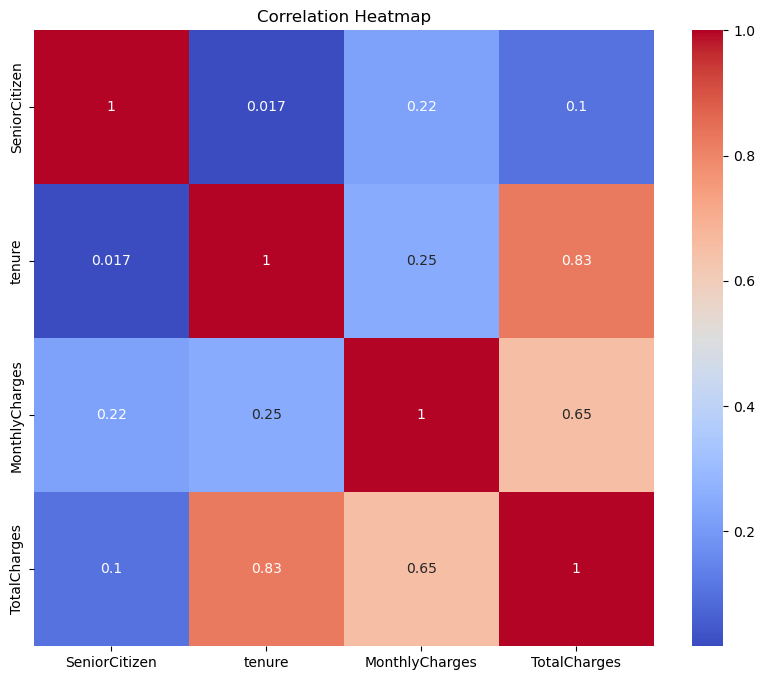

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../output/correlation_heatmap.png')
plt.show()

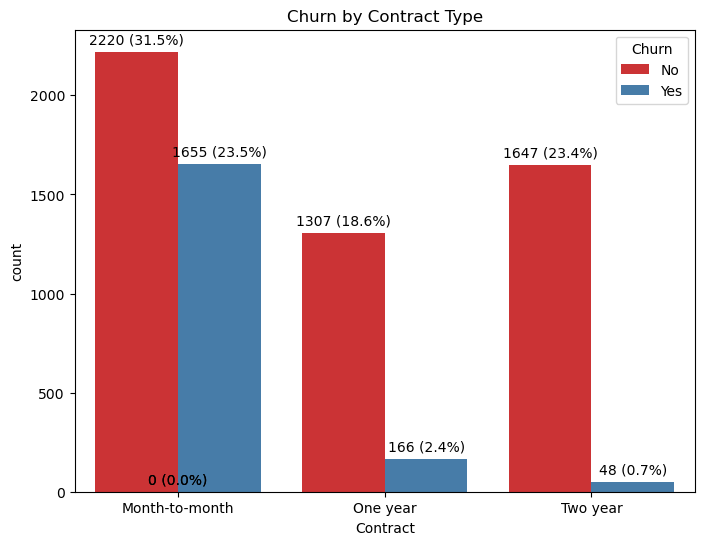

In [8]:
# Churn by contract type
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Contract Type')

for bar in ax.patches:
    count = int(bar.get_height())
    percentage = count / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2, count+25, f'{count} ({percentage:.1f}%)', 
            ha='center', va='bottom')
plt.savefig('../output/churn_by_contract.png')
plt.show()


# Visualize & Handle Outliers

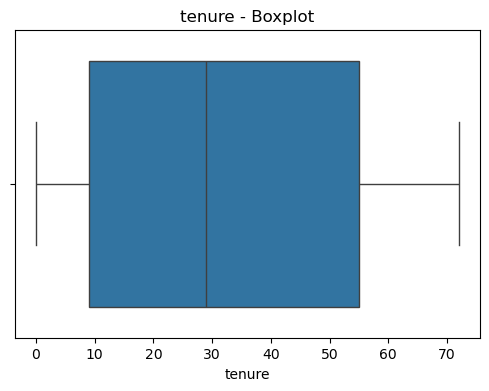

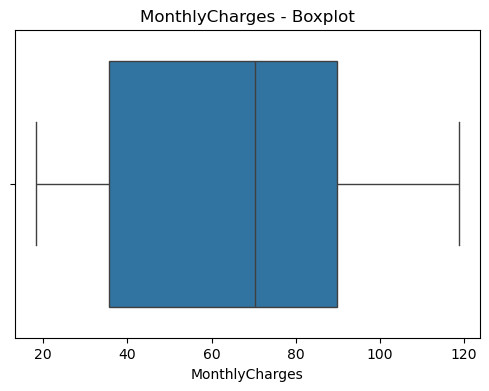

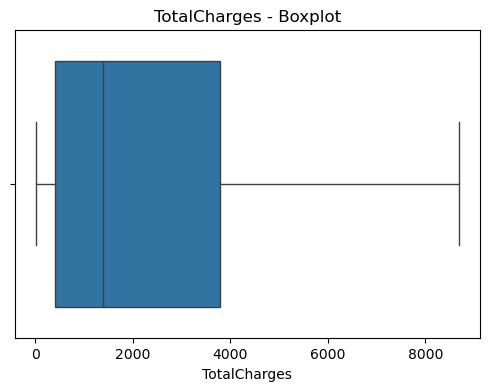

Rows before outlier removal: 7043
Rows after outlier removal: 7032
Removed 11 rows using IQR filtering.


In [9]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

original_len = len(df)

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.savefig(f'../output/{col}_boxplot.png')
    plt.show()
    
    df = remove_outliers_iqr(df, col)

print(f"Rows before outlier removal: {original_len}")
print(f"Rows after outlier removal: {len(df)}")
print(f"Removed {original_len - len(df)} rows using IQR filtering.")

# Encode Categorical Features

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encoding
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
], drop_first=True)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


# Normalize Numerical Features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']]
)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False
